## Loading of Stringer orientations data

includes some visualizations

In [ ]:
#@title Data retrieval
import os, requests

fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [ ]:
#@title Data retrieval - spontaneous
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [ ]:
#@title Data loading
import numpy as np
spont_dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(spont_dat.keys())

#@title Data loading
evoked_dat = np.load('stringer_orientations.npy', allow_pickle=True).item()
print(evoked_dat.keys())


dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])
dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


dat has fields:
* dat['sresp']: neurons by stimuli, a.k.a. the neural response data (23589 by 4598). Each 4598 trial is one second and has a specific orientation
* dat['run']: 1 by stimuli, a.k.a. the running speed of the animal in arbitrary units
* dat['istim']: 1 by stimuli, goes from 0 to 2*np.pi, the orientations shown on each trial
* dat['stat']: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.
* dat['stat'][k]['med']: 1 by 2, the position of each neuron k in tissue, in pixels, at a resolution of ~2um/pix. 
* dat['u_spont']: neurons by 128, the weights for the top 128 principal components of spontaneous activity. Unit norm.
* dat['v_spont']: 128 by 910, the timecourses for the top 128 PCs of spont activity.
* dat['u_spont'] @ dat['v_spont']: a reconstruction of the spontaneous activity for 910 timepoints interspersed throughout the recording.

In [ ]:
#@title import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

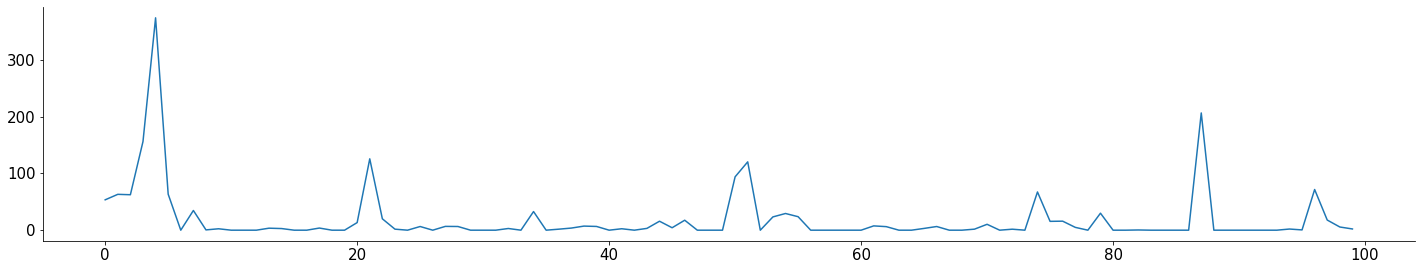

In [ ]:
plt.plot(dat['sresp'][0,0:100])

# **Process evoked data**

Layer depths: [-450. -425. -400. -375. -350. -325. -300. -275. -250. -225. -200. -175.
 -150.]


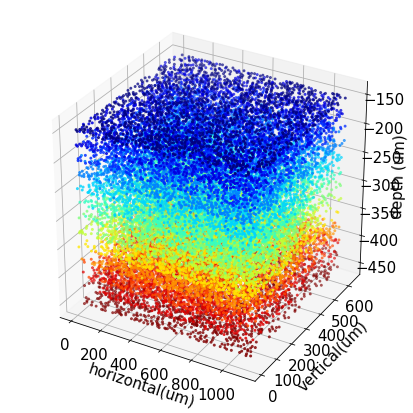

In [ ]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = evoked_dat['xyz']
zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

print('Layer depths:', np.unique(z))

In [ ]:
# ASSIGN LAYER LABELS TO EACH CELL
#L2/3 = 150 - 300
# L4 = 300 - 400
# L5 = 400 - 

abs_z = abs(z)
l2_evoked = np.where(abs_z < 300)[0]
l4_evoked = np.where(np.logical_and(abs_z >= 300, abs_z < 400))[0]
l5_evoked = np.where(abs_z >= 400)[0]

evoked_labels = np.zeros(z.shape[0])
evoked_labels[l2_evoked] = 2
evoked_labels[l4_evoked] = 4
evoked_labels[l5_evoked] = 5

In [ ]:
l2_evoked_sample = np.random.choice(l2_evoked, len(l5_evoked))
l4_evoked_sample = np.random.choice(l4_evoked, len(l5_evoked))

evoked_labels_sample = np.zeros(z.shape[0])
evoked_labels_sample[l2_evoked_sample] = 2
evoked_labels_sample[l4_evoked_sample] = 4
evoked_labels_sample[l5_evoked] = 5


In [ ]:
l2 = evoked_dat['sresp'][l2_evoked]
l4 = evoked_dat['sresp'][l4_evoked]
l5 = evoked_dat['sresp'][l5_evoked]

l2_sample = evoked_dat['sresp'][l2_evoked_sample]
l4_sample = evoked_dat['sresp'][l4_evoked_sample]

-150.0
-150.0
-150.0


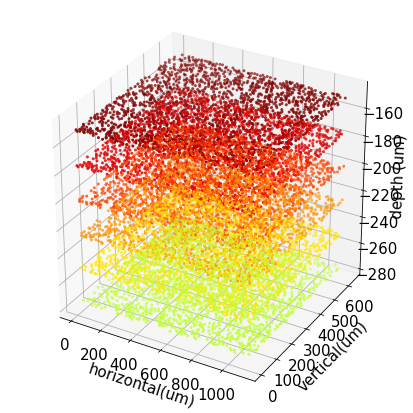

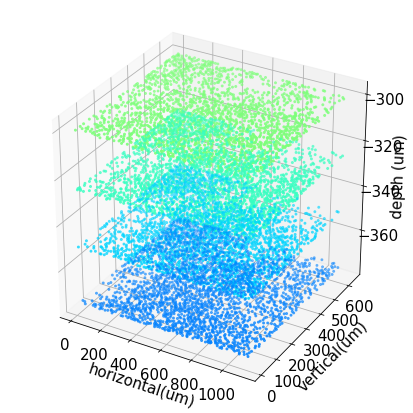

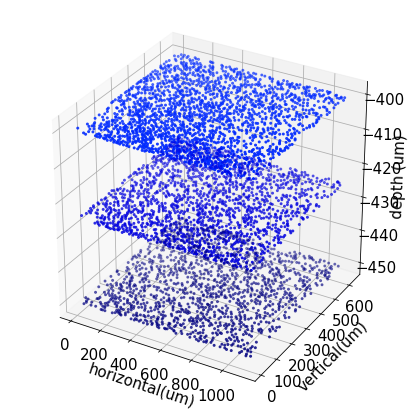

In [ ]:
# @title plot the 3D positions of all neurons
label_vec = [2,4, 5]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
for i in label_vec:
  x, y, z = evoked_dat['xyz']
  print(np.max(z))
  zunq, iunq = np.unique(z, return_inverse=True)
  xc = np.linspace(0.0, 1.0, len(zunq))
  cmap = cm.get_cmap('jet')(xc)

  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111, projection='3d')
  current_layer = np.where(evoked_labels == i)[0]
  ax.scatter(x[current_layer],y[current_layer],z[current_layer], 'o', s = 4, c = cmap[iunq][current_layer])
  ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

In [ ]:
# CALCULATE CORRELATION FOR EACH LAYER
label_vec = [2,4,5]
for i in label_vec:
  f, ax = plt.subplots(figsize = (10,10))
  current_layer = np.where(labels == i)[0]
  corr = np.corrcoef(dat['sresp'][current_layer])
  ax.matshow(corr, vmin = 0, vmax = 0.5)
  #cax0 = divider.append_axes("right", size="5%", pad=0.05)
  #cbar0 = f.colorbar(plot1, cax=cax0, label = 'correlation')  
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

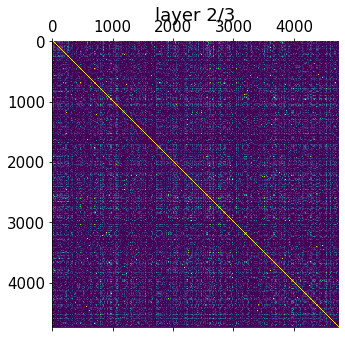

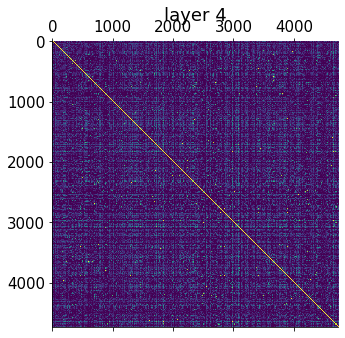

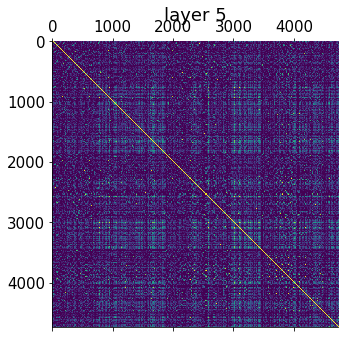

In [ ]:
# CALCULATE CORRELATION FOR EACH LAYER (SAME NUMBER OF CELLS)
label_vec = [l2_sample,l4_sample,l5]
layer_names = ['layer 2/3', 'layer 4', 'layer 5']

for j,i in enumerate (label_vec):
  f, ax = plt.subplots(figsize = (5,5))
  corr = np.corrcoef(dat['sresp'][i])
  ax.matshow(corr, vmin = 0, vmax = 0.5)
  plt.title(layer_names[j])

  plt.show()

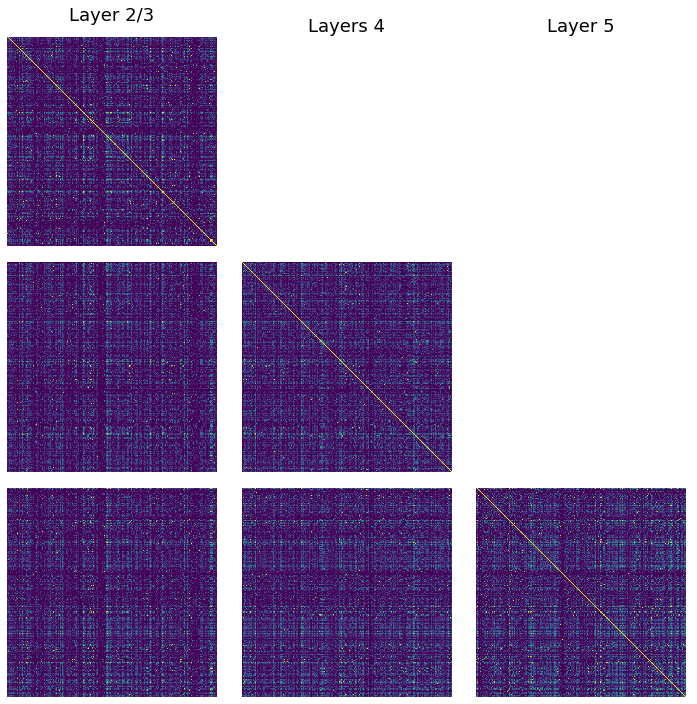

In [ ]:
#@ CALCULATE CORRELATION within layer and across layers 
label_vec = [l2_sample,l4_sample,l5]
layer_names = ['layer 2/3', 'layer 4', 'layer 5']
k=0
f, ax = plt.subplots(3,3, figsize=(10,10))
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[1,2].axis('off')
for j,i in enumerate(label_vec):
  for l in range(j,3):
    corr = np.corrcoef(dat['sresp'][i],dat['sresp'][label_vec[l]])
    #plt.subplot(3,3,k+1)
    ax[l,j].matshow(corr[-len(l2_sample):,:len(l2_sample)], vmin = 0, vmax = 0.4)
    ax[l,j].axis('off')
    #plt.title('Correlation between layers ' +str(layer_names[j]) +' and '+ str(layer_names[l]))
# TODO
# fix fig size and space between 
# remove axis labels 
ax[0,0].get_xaxis().set_visible(True)
ax[0,0].set_ylabel('Layer 2/3')
ax[1,0].set_ylabel('Layer 4')
ax[2,0].set_ylabel('Layer 5')
ax[0,0].set_title('Layer 2/3')
ax[0,1].set_title('Layers 4')
ax[0,2].set_title('Layer 5')
# 
plt.show()

In [ ]:
# CORRELATIONS ACROSS LAYERS

label_vec = [l2_sample,l4_sample,l5]
layer_names = ['layer 2/3', 'layer 4', 'layer 5']

for j,i in enumerate (label_vec):
  f, ax = plt.subplots(figsize = (5,5))
  corr = np.corrcoef(dat['sresp'][])
  ax.matshow(corr, vmin = 0, vmax = 0.5)
  plt.title(layer_names[j])

  plt.show()

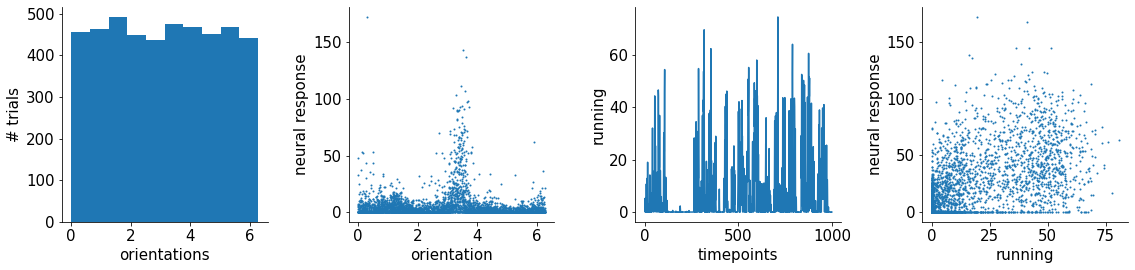

In [ ]:
#@title Basic data properties using plot, hist and scatter
ax = plt.subplot(1,5,1)
plt.hist(dat['istim'])
ax.set(xlabel='orientations', ylabel = '# trials')

ax = plt.subplot(1,5,2)
plt.scatter(dat['istim'], dat['sresp'][1000], s= 1)
ax.set(xlabel = 'orientation', ylabel = 'neural response')

ax = plt.subplot(1,5,3)
plt.plot(dat['run'][:1000])
ax.set(xlabel = 'timepoints', ylabel = 'running')

ax = plt.subplot(1,5,4)
plt.scatter(dat['run'], dat['sresp'][20998], s= 1)
ax.set(xlabel = 'running', ylabel = 'neural response')

plt.show()

# **Process spontaneous data**

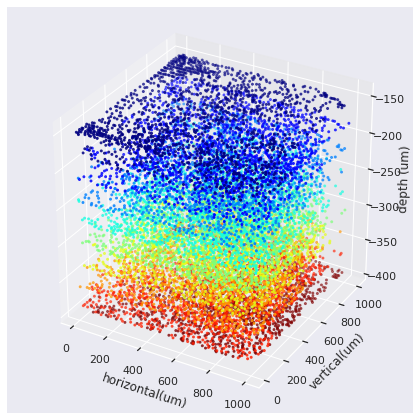

In [ ]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = spont_dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

In [ ]:
# ASSIGN LAYER LABELS TO EACH CELL
#L2/3 = 150 - 300
# L4 = 300 - 400
# L5 = 400 - 
abs_z = abs(z)
l2_spont = np.where(abs_z < 300)[0]
l4_spont = np.where(np.logical_and(abs_z >= 300, abs_z < 400))[0]

spont_labels = np.zeros(z.shape[0])
spont_labels[l2_spont] = 2
spont_labels[l4_spont] = 4

In [ ]:
l2_sp = spont_dat['sresp'][l2_spont]
l4_sp = spont_dat['sresp'][l4_spont]

l2_spont_sample = np.random.choice(l2_spont, len(l4_spont))

spont_labels_sample = np.zeros(z.shape[0])
spont_labels_sample[l2_spont_sample] = 2
spont_labels_sample[l4_spont_sample] = 4

l2_sample_sp = spont_dat['sresp'][l2_spont_sample]


-150.0
-150.0


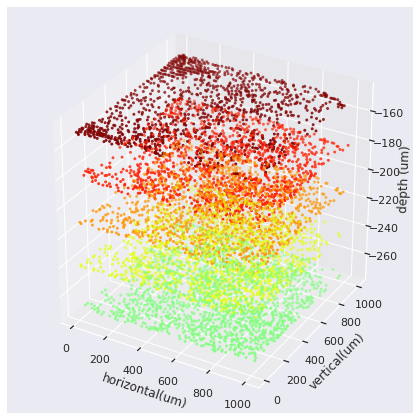

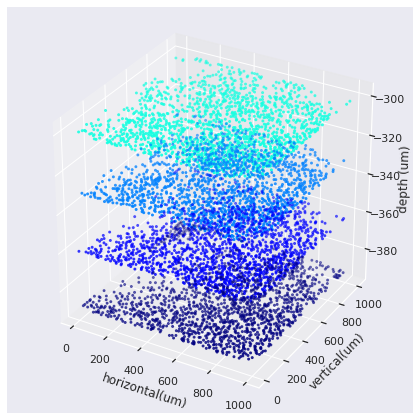

In [ ]:
# @title plot the 3D positions of all neurons
label_vec = [2,4]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
for i in label_vec:
  x, y, z = spont_dat['xyz']
  print(np.max(z))
  zunq, iunq = np.unique(z, return_inverse=True)
  xc = np.linspace(0.0, 1.0, len(zunq))
  cmap = cm.get_cmap('jet')(xc)

  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111, projection='3d')
  current_layer = np.where(spont_labels == i)[0]
  ax.scatter(x[current_layer],y[current_layer],z[current_layer], 'o', s = 4, c = cmap[iunq][current_layer])
  ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

# **Dimensionality of layers**

In [ ]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [ ]:
l2_pca = PCA()
l2_pca.fit(l2.T)

l4_pca = PCA()
l4_pca.fit(l4.T)

l5_pca = PCA()
l5_pca.fit(l5.T)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
l2_sample_pca = PCA()
l2_sample_pca.fit(l2_sample.T)

l4_sample_pca = PCA()
l4_sample_pca.fit(l4_sample.T)

l5_pca = PCA()
l5_pca.fit(l5.T)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

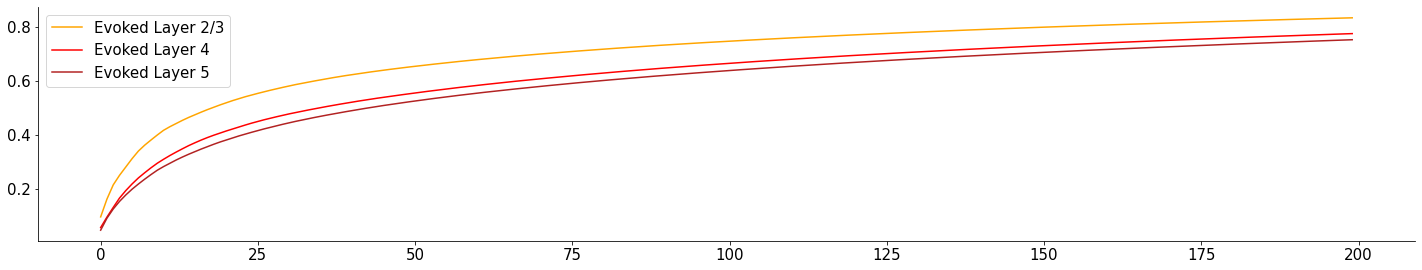

In [ ]:
l2_explained_variance = np.cumsum(l2_sample_pca.explained_variance_ratio_)
l4_explained_variance = np.cumsum(l4_sample_pca.explained_variance_ratio_)
l5_explained_variance = np.cumsum(l5_pca.explained_variance_ratio_)

plt.plot(l2_explained_variance[:200], label='Evoked Layer 2/3', linestyle = '-', c = 'orange')
plt.plot(l4_explained_variance[:200], label='Evoked Layer 4',linestyle = '-', c = 'red')
plt.plot(l5_explained_variance[:200], label='Evoked Layer 5',linestyle = '-', c = 'firebrick')
plt.legend()

# **Predicting orientation from PCs**
* compare to regularisation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
thresh = 0.8
l2_ncomp = np.where(l2_explained_variance > thresh)[0][0]
l4_ncomp = np.where(l4_explained_variance > thresh)[0][0]
l5_ncomp = np.where(l5_explained_variance > thresh)[0][0]
print('layer 2 =' + str(l2_ncomp),'layer 4 =' + str(l4_ncomp),'layer 5 =' + str(l5_ncomp))

NameError: ignored

In [ ]:
l2_ncomp = 10
l2_sample_pca = PCA(n_components = l2_ncomp)
l2_sample_pca.fit(l2_sample.T)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
l2_sample_pca.components_.shape

(10, 4739)

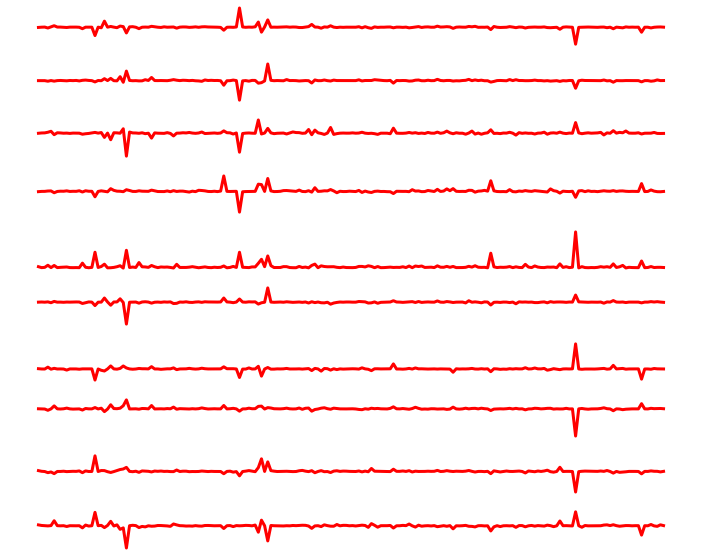

In [ ]:
plt.figure(figsize=(10,8))
for i in range(10):
  plt.subplot(10,1,i+1)
  plt.plot(l2_sample_pca.components_[i,0:200],linewidth=3.0, c='red')
  plt.axis('off')
plt.savefig('pca.svg', transparent = True)

In [ ]:
l2_sample_pca = PCA(n_components = l2_ncomp)
l2_sample_pca.fit(l2_sample.T)
l4_sample_pca = PCA(n_components = l4_ncomp)
l4_sample_pca.fit(l4_sample.T)
l5_pca = PCA(n_components = l5_ncomp)
l5_pca.fit(l5.T)

l2_trans = l2_sample_pca.fit_transform(l2_sample.T)
l4_trans = l4_sample_pca.fit_transform(l4_sample.T)
l5_trans = l5_pca.fit_transform(l5.T)

In [ ]:
#Layer 2
stim = evoked_dat['istim']
resp = evoked_dat['sresp']

X = preprocessing.scale(l2_trans)
y = stim


scores_l2 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l2.mean(), scores_l2.std() * 2))

Accuracy: 0.70 (+/- 0.04)


In [ ]:
#Layer 4
stim = evoked_dat['istim']
resp = evoked_dat['sresp']
X = preprocessing.scale(l4_trans)
y = stim


# Create linear regression object
regr = linear_model.LinearRegression()

scores_l4 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l4.mean(), scores_l4.std() * 2))

Accuracy: 0.73 (+/- 0.06)


In [ ]:
#Layer 5
stim = evoked_dat['istim']
resp = evoked_dat['sresp']
X = preprocessing.scale(l5_trans)
y = stim

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l5 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l5.mean(), scores_l5.std() * 2))

Accuracy: 0.74 (+/- 0.08)


In [ ]:
scores_l2 = np.abs(scores_l2)
scores_l4 = np.abs(scores_l4)
scores_l5 = np.abs(scores_l5)

outcome = [scores_l2, scores_l4, scores_l5]



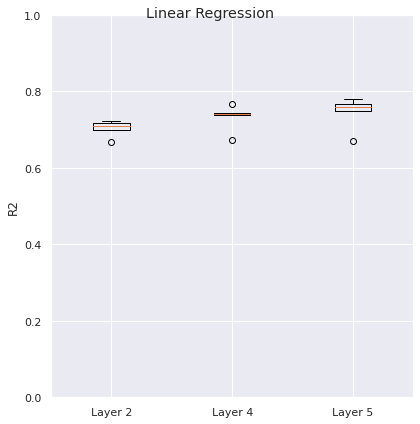

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Linear Regression')
ax = fig.add_subplot(111)
ax.boxplot(outcome)
ax.set_xticklabels(['Layer 2', 'Layer 4', 'Layer 5'])
ax.set_ylabel('R2')
ax.set_ylim(0,1)
plt.show()

In [ ]:
slide = np.linspace(0.5,0.9,10)
l2_dict = {}
l4_dict = {}
l5_dict = {}
dict_list = l2_dict, l4_dict, l5_dict

for current_thresh in slide:
  l2_ncomp = np.where(l2_explained_variance > current_thresh)[0][0]
  l4_ncomp = np.where(l4_explained_variance > current_thresh)[0][0]
  l5_ncomp = np.where(l5_explained_variance > current_thresh)[0][0]

  l2_sample_pca = PCA(n_components = l2_ncomp)
  l2_sample_pca.fit(l2_sample.T)
  l4_sample_pca = PCA(n_components = l4_ncomp)
  l4_sample_pca.fit(l4_sample.T)
  l5_pca = PCA(n_components = l5_ncomp)
  l5_pca.fit(l5.T)
  pca_list = [l2_sample_pca, l4_sample_pca, l5_pca]
  data_list = [l2_sample, l4_sample, l5]

  for f in range(len(pca_list)):  
    X = preprocessing.scale(pca_list[f].fit_transform(data_list[f].T))
    y = stim

    output = {str(current_thresh): cross_val_score(regr, X, y, cv=5, scoring = 'r2')}
    dict_list[f].update(output)
    print('Done ' + str(f) + 'of ' + str(current_thresh) )


Done 0of 0.5
Done 1of 0.5
Done 2of 0.5
Done 0of 0.5444444444444444
Done 1of 0.5444444444444444
Done 2of 0.5444444444444444
Done 0of 0.5888888888888889
Done 1of 0.5888888888888889
Done 2of 0.5888888888888889
Done 0of 0.6333333333333333
Done 1of 0.6333333333333333
Done 2of 0.6333333333333333
Done 0of 0.6777777777777778
Done 1of 0.6777777777777778
Done 2of 0.6777777777777778
Done 0of 0.7222222222222222
Done 1of 0.7222222222222222
Done 2of 0.7222222222222222
Done 0of 0.7666666666666666
Done 1of 0.7666666666666666
Done 2of 0.7666666666666666
Done 0of 0.8111111111111111
Done 1of 0.8111111111111111
Done 2of 0.8111111111111111
Done 0of 0.8555555555555556
Done 1of 0.8555555555555556
Done 2of 0.8555555555555556
Done 0of 0.9
Done 1of 0.9
Done 2of 0.9


In [ ]:
#Plot
l2_current = []
pc_label = []
for i in slide:
  l2_current = np.append(l2_current, np.abs(l2_dict[str(i)]))
  for e in range(5):
    pc_label = np.append(pc_label, str(round(i,3)))

    

l4_current = []
for i in slide:
  l4_current = np.append(l4_current, np.abs(l4_dict[str(i)]))

l5_current = []
for i in slide:
  l5_current = np.append(l5_current, np.abs(l5_dict[str(i)]))

import pandas as pd
l2_df = pd.DataFrame( {"r2": l2_current, "PC variance": pc_label } )
l4_df = pd.DataFrame( {"r2": l4_current, "PC variance": pc_label } )
l5_df = pd.DataFrame( {"r2": l5_current, "PC variance": pc_label } )

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

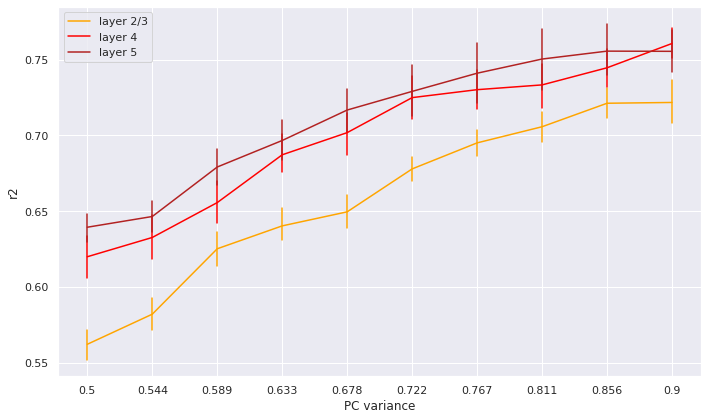

In [ ]:
fig = plt.figure(figsize=(10,6))
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="PC variance", y="r2", data=l2_df, c = 'orange', label = 'layer 2/3', err_style = 'bars', ci = 68)
ax = sns.lineplot(x="PC variance", y="r2", data=l4_df, c = 'red' , label = 'layer 4', err_style = 'bars', ci = 68)
ax = sns.lineplot(x="PC variance", y="r2", data=l5_df, c = 'firebrick', label = 'layer 5', err_style = 'bars', ci = 68)
ax.set_ylabel('r2')
plt.legend()
plt.show()


In [ ]:
pc_slide = np.linspace(10,210,11).astype(int)
pc_slide

array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210])

In [ ]:
#Check for number of PCs


pc_slide = np.linspace(10,210,11).astype(int)
l2_dict = {}
l4_dict = {}
l5_dict = {}
dict_list = l2_dict, l4_dict, l5_dict

for current_thresh in pc_slide:

  l2_sample_pca = PCA(current_thresh)
  l2_sample_pca.fit(l2_sample.T)
  l4_sample_pca = PCA(current_thresh)
  l4_sample_pca.fit(l4_sample.T)
  l5_pca = PCA(current_thresh)
  l5_pca.fit(l5.T)
  pca_list = [l2_sample_pca, l4_sample_pca, l5_pca]
  data_list = [l2_sample, l4_sample, l5]

  for f in range(len(pca_list)):  
    X = pca_list[f].fit_transform(data_list[f].T)
    y = stim
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train,y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    output = {str(current_thresh): cross_val_score(regr, X, y, cv=5, scoring = 'neg_mean_squared_error')}
    dict_list[f].update(output)
    print('Done ' + str(f) + 'of ' + str(current_thresh) )


Done 0of 10
Done 1of 10
Done 2of 10
Done 0of 30
Done 1of 30
Done 2of 30
Done 0of 50
Done 1of 50
Done 2of 50
Done 0of 70
Done 1of 70
Done 2of 70
Done 0of 90
Done 1of 90
Done 2of 90
Done 0of 110
Done 1of 110
Done 2of 110
Done 0of 130
Done 1of 130
Done 2of 130
Done 0of 150
Done 1of 150
Done 2of 150
Done 0of 170
Done 1of 170
Done 2of 170
Done 0of 190
Done 1of 190
Done 2of 190
Done 0of 210
Done 1of 210
Done 2of 210


In [ ]:
#Plot
l2_current = []
pc_label = []
for i in pc_slide:
  l2_current = np.append(l2_current, np.abs(l2_dict[str(i)]))
  for e in range(5):
    pc_label = np.append(pc_label, str(round(i,3)))

l4_current = []
for i in pc_slide:
  l4_current = np.append(l4_current, np.abs(l4_dict[str(i)]))

l5_current = []
for i in pc_slide:
  l5_current = np.append(l5_current, np.abs(l5_dict[str(i)]))

import pandas as pd
l2_pc_df = pd.DataFrame( {"MSE": l2_current, "PCs": pc_label } )
l4_pc_df = pd.DataFrame( {"MSE": l4_current, "PCs": pc_label } )
l5_pc_df = pd.DataFrame( {"MSE": l5_current, "PCs": pc_label } )

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

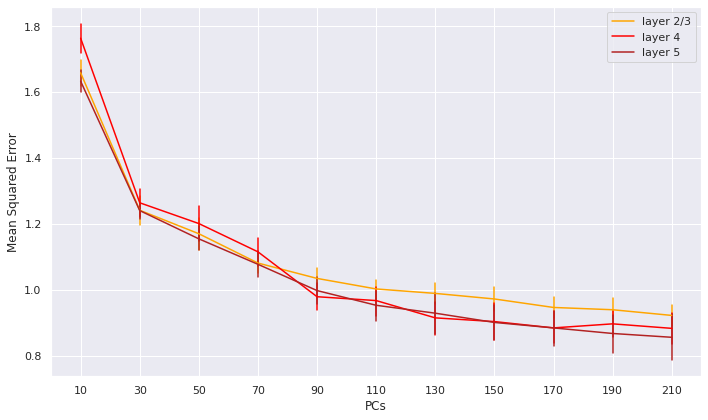

In [ ]:
fig = plt.figure(figsize=(10,6))
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="PCs", y="MSE", data=l2_pc_df, c = 'orange', label = 'layer 2/3', err_style = 'bars', ci = 68, sort = False)
ax = sns.lineplot(x="PCs", y="MSE", data=l4_pc_df, c = 'red' , label = 'layer 4', err_style = 'bars', ci = 68, sort = False)
ax = sns.lineplot(x="PCs", y="MSE", data=l5_pc_df, c = 'firebrick', label = 'layer 5', err_style = 'bars', ci = 68, sort = False)
ax.set_ylabel('Mean Squared Error')
plt.legend()
plt.show()


# **Orientation selectivity**



In [40]:
stim = evoked_dat['istim']
resp = evoked_dat['sresp']

In [41]:
orientations = np.linspace(0, (2*np.pi), 21)[0:-1] # 20 stimuli bins, 18 degrees apar
stim_binned = stim.copy()

for i in range(len(stim_binned)):
  stim_binned[i] = orientations[np.argmin(abs(stim_binned[i] - orientations))] # Makes array of shape (stimuli, ), but with binned orientation values

stim_binned.shape

(4598,)

In [42]:
stim_frames = np.zeros((resp.shape[0], len(orientations)))

for i in range(len(orientations)):  
  stim_frames[:,i] = resp[:,np.where(stim_binned == orientations[i])[0]].mean(axis = 1) # Calculate mean response for each cell and orientation

stim_frames.shape

pref_idx = np.argmax(stim_frames, axis = 1)
nonpref_idx = pref_idx - 5
print('Preferred orientation Index:', nonpref_idx)
print('Orthogonal, nonpreferred orientation Index:', nonpref_idx)

Preferred orientation Index: [13 -1  5 ... 11  2  5]
Orthogonal, nonpreferred orientation Index: [13 -1  5 ... 11  2  5]


In [43]:
# Define orientation selectivity index (OSI) for every cell

osi = np.zeros(resp.shape[0])
ori_sel = np.zeros(resp.shape[0])

for i in range(resp.shape[0]):
  mu_max = stim_frames[i, pref_idx[i]]
  mu_orth = stim_frames[i, nonpref_idx[i]]

  osi[i] = (mu_max - mu_orth) / (mu_max + mu_orth)

  if osi[i] >= 0.3:
    ori_sel[i] = orientations[pref_idx[i]]
  else: 
    ori_sel[i] = np.nan

ori_sel.shape   # Array of shape (cells, ) with orentation selectivity (or NaN)

(23589,)

In [ ]:
# Number of not orientation selective cells
np.sum(np.isnan(ori_sel))

3024

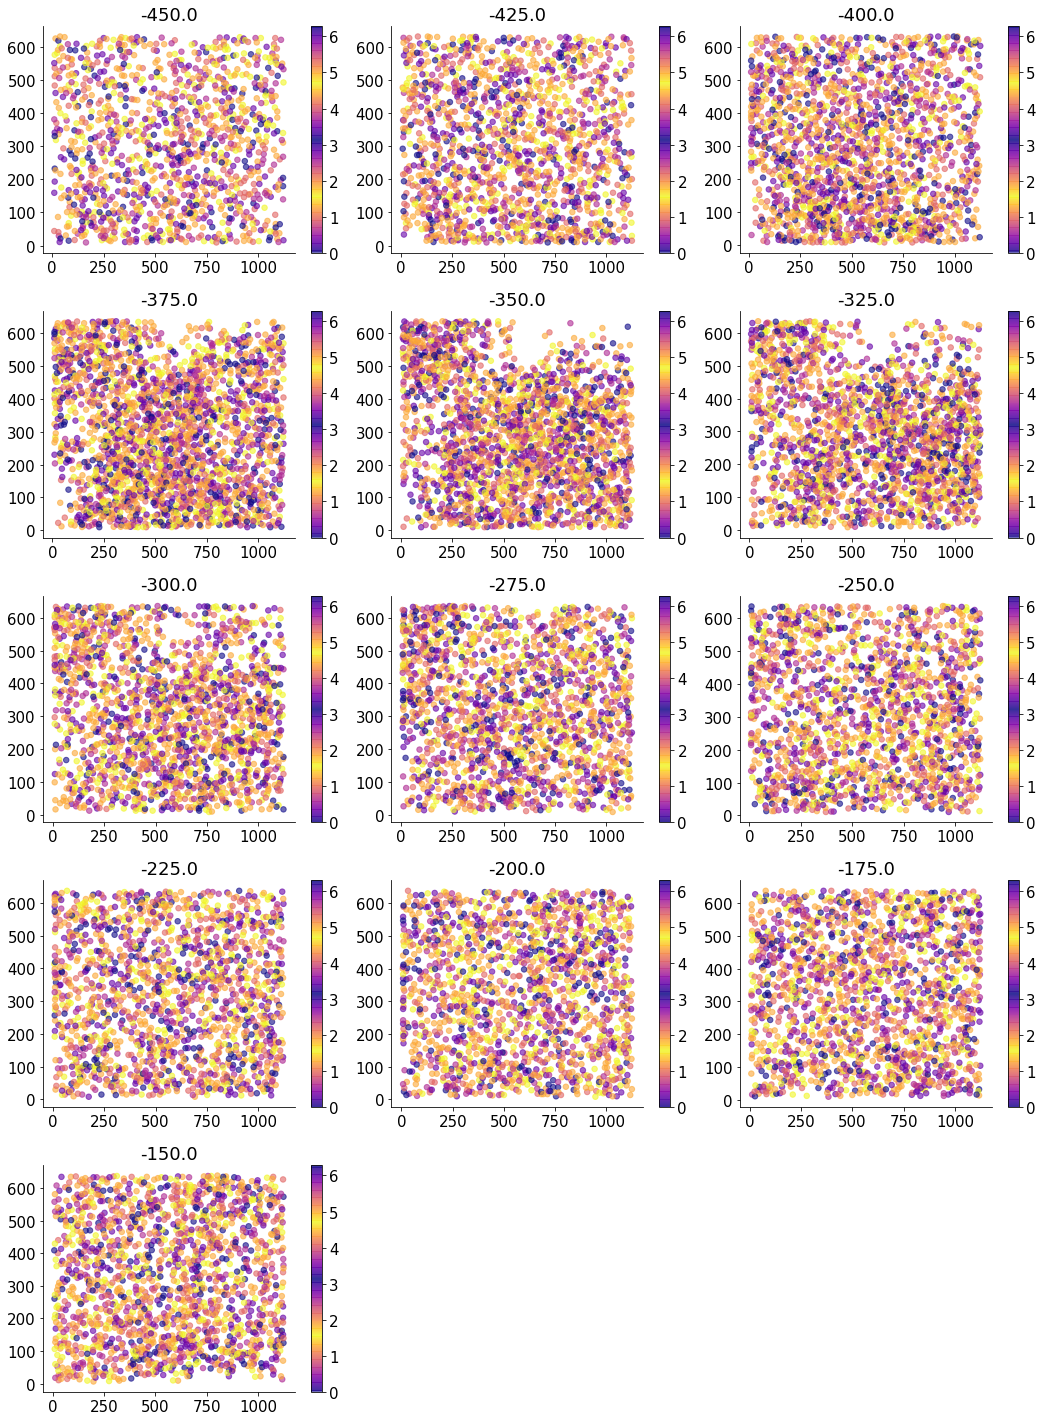

In [ ]:
# Plot cells in all layers, color coded by orientation selectivity
plt.figure(figsize=(15,20))

for i, zi in enumerate(np.unique(z)):
  pl = evoked_dat['sresp'][np.where(z==zi)]
  x_pl, y_pl, z_pl = evoked_dat['xyz'][:,np.where(z==zi)]

  ori_select = ori_sel[np.argmax(pl, axis=1)]

  plt.subplot(5,3,i+1)
  plt.scatter(x_pl[::-1],y_pl[::-1],c=ori_select, cmap=newcmp, vmin = 0, vmax=2*np.pi, alpha = 0.6, s=30)
  plt.title(zi)
  plt.colorbar()

# **Logistic regression for PCs**

In [29]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [32]:
l2_sample.shape

(4739, 4598)

In [ ]:
l2_pca = PCA()
l2_pca.fit(l2.T)

l4_pca = PCA()
l4_pca.fit(l4.T)

l5_pca = PCA()
l5_pca.fit(l5.T)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
l2_sample_pca = PCA()
l2_sample_pca.fit(l2_sample.T)

l4_sample_pca = PCA()
l4_sample_pca.fit(l4_sample.T)

l5_pca = PCA()
l5_pca.fit(l5.T)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

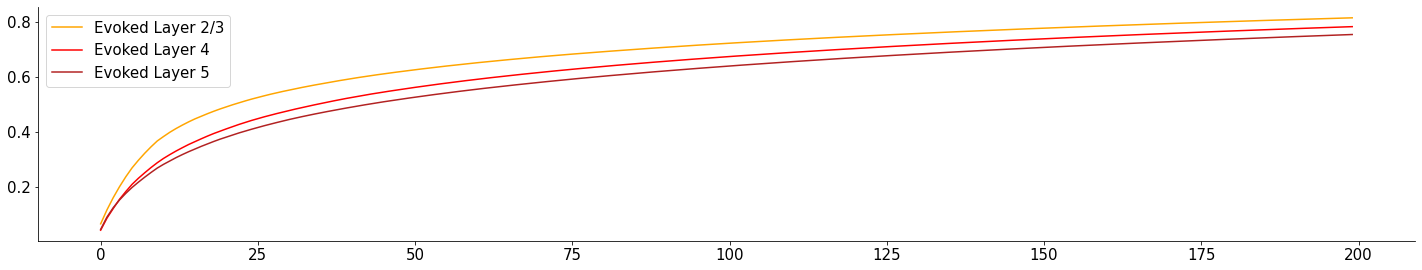

In [34]:
l2_explained_variance = np.cumsum(l2_sample_pca.explained_variance_ratio_)
l4_explained_variance = np.cumsum(l4_sample_pca.explained_variance_ratio_)
l5_explained_variance = np.cumsum(l5_pca.explained_variance_ratio_)

plt.plot(l2_explained_variance[:200], label='Evoked Layer 2/3', linestyle = '-', c = 'orange')
plt.plot(l4_explained_variance[:200], label='Evoked Layer 4',linestyle = '-', c = 'red')
plt.plot(l5_explained_variance[:200], label='Evoked Layer 5',linestyle = '-', c = 'firebrick')
plt.legend()

In [47]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [66]:
thresh = 0.58
l2_ncomp = np.where(l2_explained_variance > thresh)[0][0]
l4_ncomp = np.where(l4_explained_variance > thresh)[0][0]
l5_ncomp = np.where(l5_explained_variance > thresh)[0][0]
print('layer 2 =' + str(l2_ncomp),'layer 4 =' + str(l4_ncomp),'layer 5 =' + str(l5_ncomp))

layer 2 =37 layer 4 =56 layer 5 =70


In [67]:
l2_sample_pca = PCA(n_components = l2_ncomp)
l2_sample_pca.fit(l2_sample.T)
l4_sample_pca = PCA(n_components = l4_ncomp)
l4_sample_pca.fit(l4_sample.T)
l5_pca = PCA(n_components = l5_ncomp)
l5_pca.fit(l5.T)

l2_trans = l2_sample_pca.fit_transform(l2_sample.T)
l4_trans = l4_sample_pca.fit_transform(l4_sample.T)
l5_trans = l5_pca.fit_transform(l5.T)

In [44]:
orientations_60 = np.linspace(0, (2*np.pi), 61)[0:-1] # 20 stimuli bins, 18 degrees apar
stim_binned_60 = stim.copy()

for i in range(len(stim_binned)):
  stim_binned_60[i] = orientations_60[np.argmin(abs(stim_binned_60[i] - orientations_60))] # Makes array of shape (stimuli, ), but with binned orientation values

np.unique(stim_binned_60).shape

(60,)

In [45]:
# For logistic regression, replace radian values in stim_binned with integers between 0 and 19
stim_int_60 = np.arange(0,60)
stim_binned_int_60 = stim_binned_60

for j,i in enumerate (orientations_60):
  stim_binned_int_60[np.where(stim_binned_60 == i)] = stim_int_60[j]

stim_binned_int_60 = stim_binned_int_60.astype(int)
np.unique(stim_binned_int_60).shape

(60,)

In [68]:
#Layer 2
stim = evoked_dat['istim']
resp = evoked_dat['sresp']
cv = 15
X = preprocessing.scale(l2_trans)
y = stim_binned_int_60
accuracies_l2_60 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=cv) 


print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies_l2_60.mean(), accuracies_l2_60.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.54 (+/- 0.09)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
#Layer 4
stim = evoked_dat['istim']
resp = evoked_dat['sresp']
X = preprocessing.scale(l4_trans)
y = stim_binned_int_60


accuracies_l4_60 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=cv) 
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies_l2_60.mean(), accuracies_l2_60.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.54 (+/- 0.09)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
#Layer 5
stim = evoked_dat['istim']
resp = evoked_dat['sresp']
X = preprocessing.scale(l5_trans)
y = stim_binned_int_60

accuracies_l5_60 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=cv) 
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies_l5_60.mean(), accuracies_l5_60.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.51 (+/- 0.08)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [71]:
accuracies_l2_60 = np.abs(accuracies_l2_60)
accuracies_l4_60 = np.abs(accuracies_l4_60)
accuracies_l5_60 = np.abs(accuracies_l5_60)


outcome = [accuracies_l2_60, accuracies_l4_60, accuracies_l5_60]



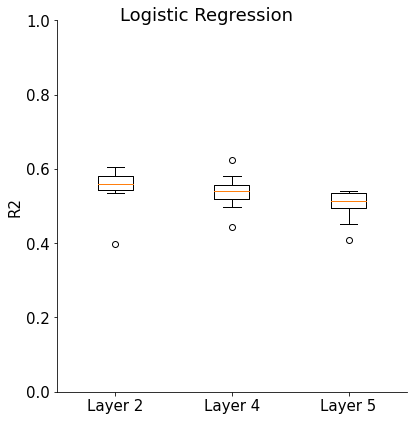

In [62]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Logistic Regression')
ax = fig.add_subplot(111)
ax.boxplot(outcome)
ax.set_xticklabels(['Layer 2', 'Layer 4', 'Layer 5'])
ax.set_ylabel('R2')
ax.set_ylim(0,1)
plt.show()

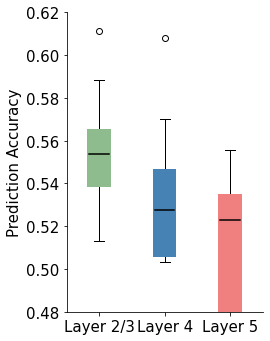

In [79]:
medianprops = dict( linewidth=1.5, color='black')
fig = plt.figure(figsize=(4,5))
ax = fig.add_subplot(111)

bplot1 = ax.boxplot(outcome,patch_artist=True,medianprops=medianprops)

ax.set_xticklabels(['Layer 2/3', 'Layer 4', 'Layer 5'])

ax.set_ylabel('Prediction Accuracy')




colors = ['darkseagreen', 'steelblue', 'lightcoral']




for patch, color in zip(bplot1['boxes'], colors):

  patch.set(color=color, linewidth=4)

  patch.set(facecolor = color )

  # change hatch

  patch.set(hatch = '/')
plt.ylim(0.48, 0.62)
plt.show()


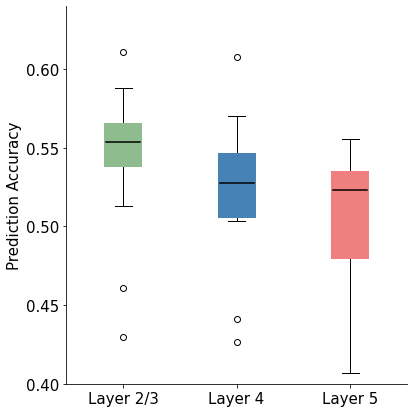

In [84]:
medianprops = dict( linewidth=1.5, color='black')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

bplot1 = ax.boxplot(outcome,patch_artist=True,medianprops=medianprops)

ax.set_xticklabels(['Layer 2/3', 'Layer 4', 'Layer 5'])

ax.set_ylabel('Prediction Accuracy')




colors = ['darkseagreen', 'steelblue', 'lightcoral']




for patch, color in zip(bplot1['boxes'], colors):

  patch.set(color=color, linewidth=4)

  patch.set(facecolor = color )

  # change hatch

  patch.set(hatch = '/')
plt.ylim(0.40, 0.64)
plt.show()


In [ ]:
slide = np.linspace(0.5,0.9,10)
l2_dict = {}
l4_dict = {}
l5_dict = {}
dict_list = l2_dict, l4_dict, l5_dict

for current_thresh in slide:
  l2_ncomp = np.where(l2_explained_variance > current_thresh)[0][0]
  l4_ncomp = np.where(l4_explained_variance > current_thresh)[0][0]
  l5_ncomp = np.where(l5_explained_variance > current_thresh)[0][0]

  l2_sample_pca = PCA(n_components = l2_ncomp)
  l2_sample_pca.fit(l2_sample.T)
  l4_sample_pca = PCA(n_components = l4_ncomp)
  l4_sample_pca.fit(l4_sample.T)
  l5_pca = PCA(n_components = l5_ncomp)
  l5_pca.fit(l5.T)
  pca_list = [l2_sample_pca, l4_sample_pca, l5_pca]
  data_list = [l2_sample, l4_sample, l5]

  for f in range(len(pca_list)):  
    X = preprocessing.scale(pca_list[f].fit_transform(data_list[f].T))
    y = stim_binned_int_60

    output = {str(current_thresh): cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=cv)} 
    dict_list[f].update(output)
    print('Done ' + str(f) + 'of ' + str(current_thresh) )


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.5444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.5444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.5444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.5888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.5888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.5888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.6777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.6777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.6777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.7222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.7222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.7222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.7666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.7666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.7666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.8111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.8111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.8111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.8555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.8555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.8555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.9


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.9


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.9


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Plot
l2_current = []
pc_label = []
for i in slide:
  l2_current = np.append(l2_current, np.abs(l2_dict[str(i)]))
  for e in range(5):
    pc_label = np.append(pc_label, str(round(i,3)))

    

l4_current = []
for i in slide:
  l4_current = np.append(l4_current, np.abs(l4_dict[str(i)]))

l5_current = []
for i in slide:
  l5_current = np.append(l5_current, np.abs(l5_dict[str(i)]))

import pandas as pd
l2_df = pd.DataFrame( {"r2": l2_current, "PC variance": pc_label } )
l4_df = pd.DataFrame( {"r2": l4_current, "PC variance": pc_label } )
l5_df = pd.DataFrame( {"r2": l5_current, "PC variance": pc_label } )

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing

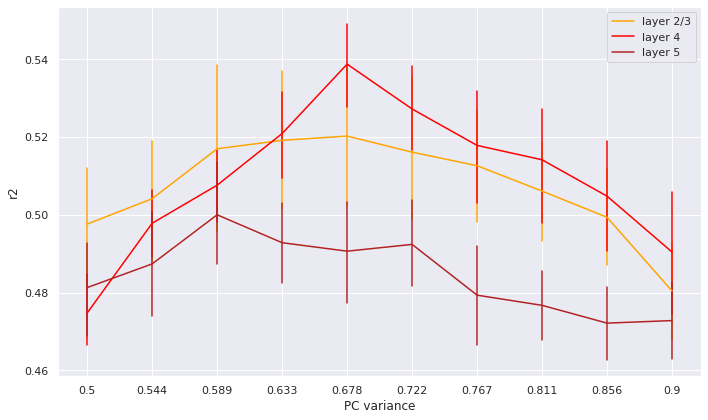

In [ ]:
fig = plt.figure(figsize=(10,6))
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="PC variance", y="r2", data=l2_df, c = 'orange', label = 'layer 2/3', err_style = 'bars', ci = 68)
ax = sns.lineplot(x="PC variance", y="r2", data=l4_df, c = 'red' , label = 'layer 4', err_style = 'bars', ci = 68)
ax = sns.lineplot(x="PC variance", y="r2", data=l5_df, c = 'firebrick', label = 'layer 5', err_style = 'bars', ci = 68)
ax.set_ylabel('r2')
plt.legend()
plt.show()


# **Evoked data - Predicting activity across layers with PCs**

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [86]:
thresh = 0.7
l2_ncomp = np.where(l2_explained_variance > thresh)[0][0]
l4_ncomp = np.where(l4_explained_variance > thresh)[0][0]
l5_ncomp = np.where(l5_explained_variance > thresh)[0][0]
print('layer 2 =' + str(l2_ncomp),'layer 4 =' + str(l4_ncomp),'layer 5 =' + str(l5_ncomp))

layer 2 =86 layer 4 =118 layer 5 =144


In [87]:
l2_sample_pca = PCA(n_components = l2_ncomp)
l2_sample_pca.fit(l2_sample.T)
l4_sample_pca = PCA(n_components = l4_ncomp)
l4_sample_pca.fit(l4_sample.T)
l5_pca = PCA(n_components = l5_ncomp)
l5_pca.fit(l5.T)

l2_trans = l2_sample_pca.fit_transform(l2_sample.T)
l4_trans = l4_sample_pca.fit_transform(l4_sample.T)
l5_trans = l5_pca.fit_transform(l5.T)

**Layer 2**

In [88]:
# Layer 2/3 to layer 4 
X = preprocessing.scale(l2_trans)
y = preprocessing.scale(l4.T)

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l2_l4 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l2_l4.mean(), scores_l2_l4.std() * 2))

Accuracy: 0.22 (+/- 0.07)


In [89]:
# Layer 2/3 to layer 5
X = preprocessing.scale(l2_trans)
y = preprocessing.scale(l5.T)

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l2_l5 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l2_l5.mean(), scores_l2_l5.std() * 2))

Accuracy: 0.23 (+/- 0.08)


**Layer 4**

In [90]:
# Layer 4 to layer 2/3

X = preprocessing.scale(l4_trans)
y = preprocessing.scale(l2.T)

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l4_l2 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l4_l2.mean(), scores_l4_l2.std() * 2))

Accuracy: 0.17 (+/- 0.09)


In [91]:
# Layer 4 to layer 5

X = preprocessing.scale(l4_trans)
y = preprocessing.scale(l5.T)

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l4_l5 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l4_l5.mean(), scores_l4_l5.std() * 2))

Accuracy: 0.26 (+/- 0.06)


**Layer 5**

In [92]:
# Layer 5 to layer 2

X = preprocessing.scale(l5_trans)
y = preprocessing.scale(l2.T)

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l5_l2 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l5_l2.mean(), scores_l5_l2.std() * 2))

Accuracy: 0.16 (+/- 0.08)


In [93]:
# Layer 5 to layer 4

X = preprocessing.scale(l5_trans)
y = preprocessing.scale(l4.T)

# Create linear regression object
regr = linear_model.LinearRegression()

scores_l5_l4 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l5_l4.mean(), scores_l5_l4.std() * 2))

Accuracy: 0.24 (+/- 0.04)


In [94]:
outcome_layers = [scores_l2_l4, scores_l2_l5, scores_l4_l2, scores_l4_l5,scores_l5_l2, scores_l5_l4 ]
outcome_layers

[array([0.15965422, 0.24991468, 0.24996206, 0.2435844 , 0.21942872]),
 array([0.16062785, 0.26302335, 0.26079797, 0.24892171, 0.21757364]),
 array([0.09162287, 0.17434242, 0.20994233, 0.21092761, 0.17572161]),
 array([0.21066922, 0.28152785, 0.28246708, 0.27214767, 0.24069451]),
 array([0.07653067, 0.15010401, 0.1893922 , 0.1891308 , 0.17083837]),
 array([0.19546872, 0.25143204, 0.25258527, 0.24856312, 0.23311808])]

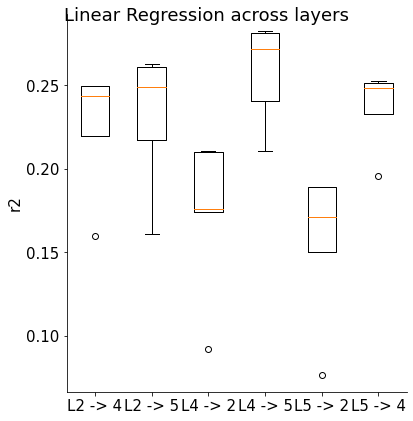

In [95]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Linear Regression across layers')
ax = fig.add_subplot(111)
ax.boxplot(outcome_layers)
ax.set_xticklabels(['L2 -> 4', 'L2 -> 5', 'L4 -> 2', 'L4 -> 5', 'L5 -> 2', 'L5 -> 4'])
ax.set_ylabel('r2')
plt.show()

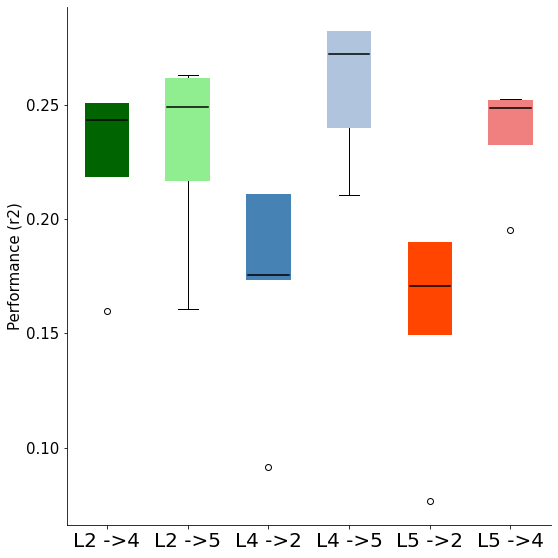

In [108]:
medianprops = dict( linewidth=1.5, color='black')

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)

bplot1 = ax.boxplot(outcome_layers,patch_artist=True,medianprops=medianprops)

ax.set_xticklabels(['L2 ->4', 'L2 ->5', 'L4 ->2', 'L4 ->5', 'L5 ->2', 'L5 ->4'], fontsize = 20)
#ax.xlabel(fontsize=18)
ax.set_ylabel('Performance (r2)')

colors = ['darkgreen', 'lightgreen',  'steelblue', 'lightsteelblue',  'orangered', 'lightcoral']




for patch, color in zip(bplot1['boxes'], colors):
  patch.set(color=color, linewidth=4)

  patch.set(facecolor = color )

  # change hatch

  patch.set(hatch = '/')

plt.show()


In [ ]:
slide = np.linspace(0.5,0.9,10)
l2_l4_dict = {}
l2_l5_dict = {}
l4_l2_dict = {}
l4_l5_dict = {}
l5_l2_dict = {}
l5_l4_dict = {}

dict_list = l2_l4_dict, l2_l5_dict, l4_l2_dict, l4_l5_dict, l5_l2_dict, l5_l4_dict
count=0
for current_thresh in slide:
  l2_ncomp = np.where(l2_explained_variance > current_thresh)[0][0]
  l4_ncomp = np.where(l4_explained_variance > current_thresh)[0][0]
  l5_ncomp = np.where(l5_explained_variance > current_thresh)[0][0]

  l2_sample_pca = PCA(n_components = l2_ncomp)
  l2_sample_pca.fit(l2_sample.T)
  l4_sample_pca = PCA(n_components = l4_ncomp)
  l4_sample_pca.fit(l4_sample.T)
  l5_pca = PCA(n_components = l5_ncomp)
  l5_pca.fit(l5.T)
  pca_list = [l2_sample_pca, l4_sample_pca, l5_pca]
  data_list = [l2_sample, l4_sample, l5]

  for f in range(len(pca_list)):  
    if f == 0:
      subdata_list = [l4_sample, l5]
      count=0
    if f == 1:
      subdata_list = [l2_sample, l5]
      count=2
    if f == 2:
      subdata_list = [l2_sample, l4_sample]
      count=4

    for subdata in subdata_list:
      X = preprocessing.scale(pca_list[f].fit_transform(data_list[f].T))
      y = preprocessing.scale(subdata.T)
      output = {str(current_thresh): cross_val_score(regr, X, y, cv=5, scoring = 'r2')}
      dict_list[count].update(output)
      count+=1
    print('Done ' + str(f) + 'of ' + str(current_thresh) )




Done 0of 0.5
Done 1of 0.5
Done 2of 0.5
Done 0of 0.5444444444444444
Done 1of 0.5444444444444444
Done 2of 0.5444444444444444
Done 0of 0.5888888888888889
Done 1of 0.5888888888888889
Done 2of 0.5888888888888889
Done 0of 0.6333333333333333
Done 1of 0.6333333333333333
Done 2of 0.6333333333333333
Done 0of 0.6777777777777778
Done 1of 0.6777777777777778
Done 2of 0.6777777777777778
Done 0of 0.7222222222222222
Done 1of 0.7222222222222222
Done 2of 0.7222222222222222
Done 0of 0.7666666666666666
Done 1of 0.7666666666666666
Done 2of 0.7666666666666666
Done 0of 0.8111111111111111
Done 1of 0.8111111111111111
Done 2of 0.8111111111111111
Done 0of 0.8555555555555556
Done 1of 0.8555555555555556
Done 2of 0.8555555555555556
Done 0of 0.9
Done 1of 0.9
Done 2of 0.9


In [ ]:
slide

array([0.5       , 0.54444444, 0.58888889, 0.63333333, 0.67777778,
       0.72222222, 0.76666667, 0.81111111, 0.85555556, 0.9       ])

In [ ]:
#Plot
l2_l4_current = []
pc_label = []
for i in slide:
  l2_l4_current = np.append(l2_l4_current, l2_l4_dict[str(i)])
  for e in range(5):
    pc_label = np.append(pc_label, str(round(i,3)))

l2_l5_current = []
for i in slide:
  l2_l5_current = np.append(l2_l5_current, l2_l5_dict[str(i)])

l4_l2_current = []
for i in slide:
  l4_l2_current = np.append(l4_l2_current, l4_l2_dict[str(i)])

l4_l5_current = []
for i in slide:
  l4_l5_current = np.append(l4_l5_current, l4_l5_dict[str(i)])

l5_l2_current = []
for i in slide:
  l5_l2_current = np.append(l5_l2_current, l5_l2_dict[str(i)])

l5_l4_current = []
for i in slide:
  l5_l4_current = np.append(l5_l4_current, l5_l4_dict[str(i)])

import pandas as pd
l2_l4_df = pd.DataFrame( {"r2": l2_l4_current, "PC variance": pc_label } )
l2_l5_df = pd.DataFrame( {"r2": l2_l5_current, "PC variance": pc_label } )
l4_l2_df = pd.DataFrame( {"r2": l4_l2_current, "PC variance": pc_label } )
l4_l5_df = pd.DataFrame( {"r2": l4_l5_current, "PC variance": pc_label } )
l5_l2_df = pd.DataFrame( {"r2": l5_l2_current, "PC variance": pc_label } )
l5_l4_df = pd.DataFrame( {"r2": l5_l4_current, "PC variance": pc_label } )

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

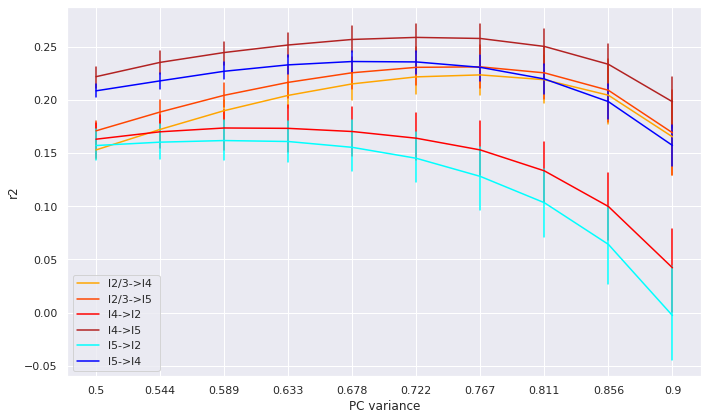

In [ ]:
fig = plt.figure(figsize=(10,6))
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="PC variance", y="r2", data=l2_l4_df, c = 'orange', label = 'l2/3->l4 ', err_style = 'bars', ci = 68, sort = False)
ax = sns.lineplot(x="PC variance", y="r2", data=l2_l5_df, c = 'orangered', linestyle = '--', label = 'l2/3->l5', err_style = 'bars', ci = 68, sort = False)

ax = sns.lineplot(x="PC variance", y="r2", data=l4_l2_df, c = 'red' , label = 'l4->l2', err_style = 'bars', ci = 68, sort = False)
ax = sns.lineplot(x="PC variance", y="r2", data=l4_l5_df, c = 'firebrick' , label = 'l4->l5', linestyle = '--', err_style = 'bars', ci = 68, sort = False)

ax = sns.lineplot(x="PC variance", y="r2", data=l5_l2_df, c = 'cyan', label = 'l5->l2', err_style = 'bars', ci = 68, sort = False)
ax = sns.lineplot(x="PC variance", y="r2", data=l5_l4_df, c = 'blue', label = 'l5->l4', linestyle = '--', err_style = 'bars', ci = 68, sort = False)
ax.set_ylabel('r2')
plt.legend()
plt.show()


# **Spont data - Predicting activity across layers with PCs**

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [110]:
l2_pca = PCA()
l2_pca.fit(l2_sp.T)

l4_pca = PCA()
l4_pca.fit(l4_sp.T)


NameError: ignored

In [ ]:
l2_sample_sp_pca = PCA()
l2_sample_sp_pca.fit(l2_sample_sp.T)

l4_pca = PCA()
l4_pca.fit(l4_sp.T)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

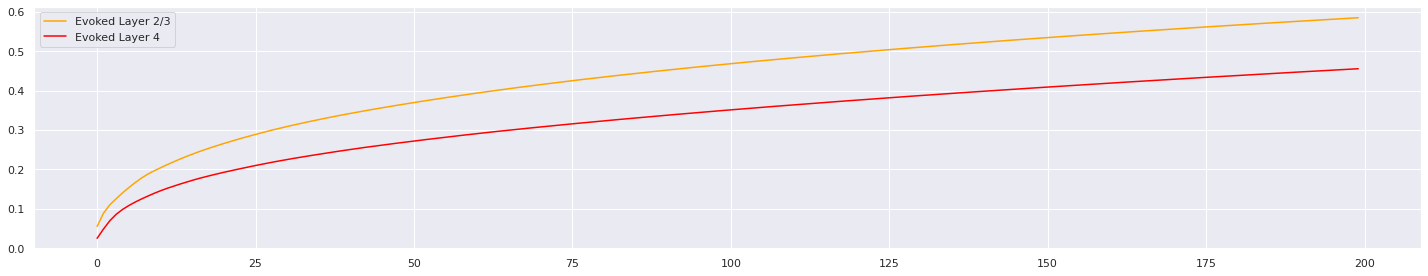

In [ ]:
l2_sp_explained_variance = np.cumsum(l2_sample_sp_pca.explained_variance_ratio_)
l4_sp_explained_variance = np.cumsum(l4_pca.explained_variance_ratio_)

plt.plot(l2_sp_explained_variance[:200], label='Evoked Layer 2/3', linestyle = '-', c = 'orange')
plt.plot(l4_sp_explained_variance[:200], label='Evoked Layer 4',linestyle = '-', c = 'red')
plt.legend()

In [ ]:
thresh = 0.7
l2_ncomp = np.where(l2_explained_variance > thresh)[0][0]
l4_ncomp = np.where(l4_explained_variance > thresh)[0][0]
print('layer 2 =' + str(l2_ncomp),'layer 4 =' + str(l4_ncomp))

layer 2 =70 layer 4 =124


In [ ]:
l2_sample_sp_pca = PCA(n_components = l2_ncomp)
l2_sample_sp_pca.fit(l2_sample_sp.T)
l4_sp_pca = PCA(n_components = l4_ncomp)
l4_sp_pca.fit(l4_sp.T)

l2_sp_trans = l2_sample_sp_pca.fit_transform(l2_sample_sp.T)
l4_sp_trans = l4_sp_pca.fit_transform(l4_sp.T)

**Layer 2**

In [ ]:
# Layer 2/3 to layer 4 
X = preprocessing.scale(l2_sp_trans)
y = preprocessing.scale(l4_sp.T)

# Create linear regression object
regr = linear_model.LinearRegression()

scores_sp_l2_l4 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_sp_l2_l4.mean(), scores_sp_l2_l4.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Accuracy: 0.05 (+/- 0.01)


**Layer 4**

In [ ]:
# Layer 4 to layer 2/3
X = preprocessing.scale(l4_sp_trans)
y = preprocessing.scale(l2_sp.T)

# Create linear regression object
regr = linear_model.LinearRegression()

scores_sp_l4_l2 = cross_val_score(regr, X, y, cv=5, scoring = 'r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_sp_l4_l2.mean(), scores_sp_l4_l2.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Accuracy: 0.03 (+/- 0.01)


In [ ]:
outcome_layers = [scores_sp_l2_l4, scores_sp_l4_l2]
outcome_layers

[array([0.04065194, 0.0431927 , 0.04234547, 0.05909859, 0.05112836]),
 array([0.02051758, 0.03333811, 0.0288211 , 0.04055149, 0.03419677])]

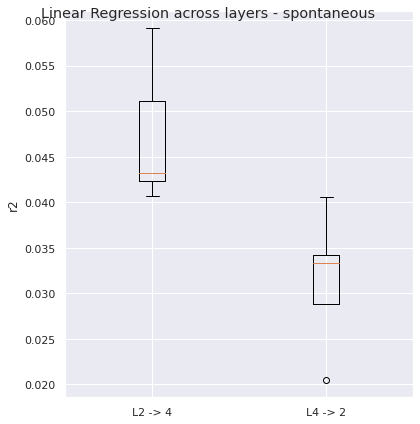

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Linear Regression across layers - spontaneous ')
ax = fig.add_subplot(111)
ax.boxplot(outcome_layers)
ax.set_xticklabels(['L2 -> 4', 'L4 -> 2'])
ax.set_ylabel('r2')
plt.show()

In [ ]:
slide = np.linspace(0.5,0.9,10)
l2_l4_sp_dict = {}
l4_l2_sp_dict = {}

# Create linear regression object
regr = linear_model.LinearRegression()

dict_list = l2_l4_sp_dict, l4_l2_sp_dict
count=0
for current_thresh in slide:
  l2_ncomp = np.where(l2_sp_explained_variance > current_thresh)[0][0]
  l4_ncomp = np.where(l4_sp_explained_variance > current_thresh)[0][0]

  l2_sample_sp_pca = PCA(n_components = l2_ncomp)
  l2_sample_sp_pca.fit(l2_sample_sp.T)

  l4_sp_pca = PCA(n_components = l4_ncomp)
  l4_sp_pca.fit(l4.T)

  l2_sp_trans = l2_sample_sp_pca.fit_transform(l2_sample_sp.T)
  l4_sp_trans = l4_sp_pca.fit_transform(l4_sp.T)



  pca_list = [l2_sample_sp_pca, l4_sp_pca]
  data_list = [l2_sample_sp, l4_sp]

  for f in range(len(pca_list)):  
    if f == 0:
      subdata_list = [l4_sp]
      count=0
    if f == 1:
      subdata_list = [l2_sample_sp]
      count=1

    for subdata in subdata_list:
      X = preprocessing.scale(pca_list[f].fit_transform(data_list[f].T))
      y = preprocessing.scale(subdata.T)
      output = {str(current_thresh): cross_val_score(regr, X, y, cv=5, scoring = 'r2')}
      dict_list[count].update(output)
      count+=1
    print('Done ' + str(f) + 'of ' + str(current_thresh) )




/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.5444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.5444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.5888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.5888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.6777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.6777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.7222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.7222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.7666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.7666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.8111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.8111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.8555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.8555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 0of 0.9


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were

Done 1of 0.9


In [ ]:
#Plot
l2_l4_current = []
pc_label = []
for i in slide:
  l2_l4_current = np.append(l2_l4_current, l2_l4_sp_dict[str(i)])
  for e in range(5):
    pc_label = np.append(pc_label, str(round(i,3)))

l4_l2_current = []
for i in slide:
  l4_l2_current = np.append(l4_l2_current, l4_l2_sp_dict[str(i)])

import pandas as pd
l2_l4_sp_df = pd.DataFrame( {"r2": l2_l4_current, "PC variance": pc_label } )
l4_l2_sp_df = pd.DataFrame( {"r2": l4_l2_current, "PC variance": pc_label } )

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

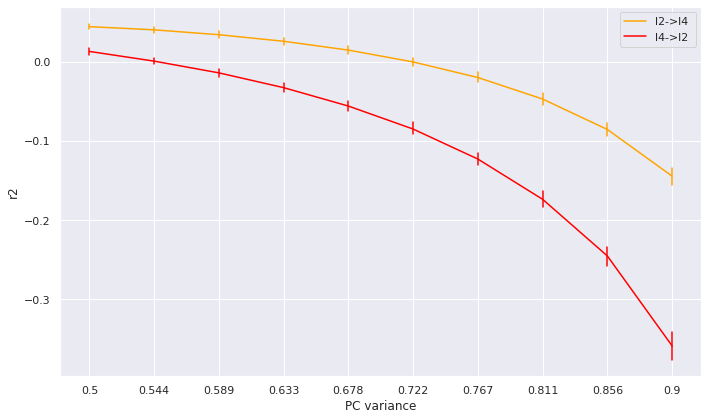

In [ ]:
fig = plt.figure(figsize=(10,6))
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="PC variance", y="r2", data=l2_l4_sp_df, c = 'orange', label = 'l2->l4 ', err_style = 'bars', ci = 68, sort = False)
ax = sns.lineplot(x="PC variance", y="r2", data=l4_l2_sp_df, c = 'red' , label = 'l4->l2', err_style = 'bars', ci = 68, sort = False)

ax.set_ylabel('r2')
plt.legend()
plt.show()
